In [1137]:
library(tidyverse)


#**Reading the data from a text file**

In [1138]:

data_frame <- read.csv("/content/Heartdiseas.txt", header = TRUE)
head(data_frame)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,1,63,1,1,145,233,1,2,150,0,2.3,3
2,2,67,1,4,160,286,0,2,108,1,1.5,2
3,3,67,1,4,120,229,0,2,129,1,2.6,2
4,4,37,1,3,130,250,0,0,187,0,3.5,3
5,5,41,0,2,130,204,0,2,172,0,1.4,1
6,6,56,1,2,120,236,0,0,178,0,0.8,1


In [1139]:
dim(data_frame)

[1] 306  12

# **number of nulls**

In [1140]:
na_count <- colSums(is.na(data_frame))
print(na_count)


      id      age      sex       cp trestbps     chol      fbs  restecg 
       0        0        0        0        0        0        0        0 
 thalach    exang  oldpeak    slope 
       0        0        0        1 


In [1141]:
#data_after_remove_nulls<-na.omit(data_frame)

In [1142]:
head(data_after_remove_nulls)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,1,63,1,1,145,233,1,2,150,0,2.3,3
2,2,67,1,4,160,286,0,2,108,1,1.5,2
3,3,67,1,4,120,229,0,2,129,1,2.6,2
4,4,37,1,3,130,250,0,0,187,0,3.5,3
5,5,41,0,2,130,204,0,2,172,0,1.4,1
6,6,56,1,2,120,236,0,0,178,0,0.8,1


In [1143]:
#na_count <- colSums(is.na(data_after_remove_nulls))
#print(na_count)

In [1144]:
dim(data_frame)

[1] 306  12

#****Scale numerical features****

In [1145]:
#with rows
duplicate_rows <- data_frame[duplicated(data_frame) | duplicated(data_frame, fromLast = TRUE), ]
print(duplicate_rows)


   id age sex cp trestbps chol fbs restecg thalach exang oldpeak slope
2   2  67   1  4      160  286   0       2     108     1     1.5     2
9   2  67   1  4      160  286   0       2     108     1     1.5     2
14  2  67   1  4      160  286   0       2     108     1     1.5     2
17  2  67   1  4      160  286   0       2     108     1     1.5     2


In [1146]:
#with id
duplicate_rows_by_id <- data_frame[duplicated(data_frame$id) | duplicated(data_frame$id, fromLast = TRUE), ]
print(duplicate_rows_by_id)

   id age sex cp trestbps chol fbs restecg thalach exang oldpeak slope
2   2  67   1  4      160  286   0       2     108     1     1.5     2
9   2  67   1  4      160  286   0       2     108     1     1.5     2
14  2  67   1  4      160  286   0       2     108     1     1.5     2
17  2  67   1  4      160  286   0       2     108     1     1.5     2


In [1147]:
#num_duplicates <- sum(duplicated(data_after_remove_nulls))
#print(num_duplicates)

In [1148]:
data_after_remove_duplicated<- data_frame[!duplicated(data_after_remove_nulls$id), ]
#(data_after_remove_duplicated)

In [1149]:
dim(data_after_remove_duplicated)

[1] 303  12

In [1150]:
negative_agee <- data_after_remove_duplicated[data_after_remove_duplicated$age < 0, ]#no negative
print(negative_agee)

 [1] id       age      sex      cp       trestbps chol     fbs      restecg 
 [9] thalach  exang    oldpeak  slope   
<0 rows> (or 0-length row.names)


#**Remove Nulls**

In [1151]:
dn <- data_after_remove_duplicated[sapply(data_after_remove_duplicated, is.numeric)]
dn <- na.omit(data_after_remove_duplicated)

In [1152]:
dim(dn)

[1] 302  12

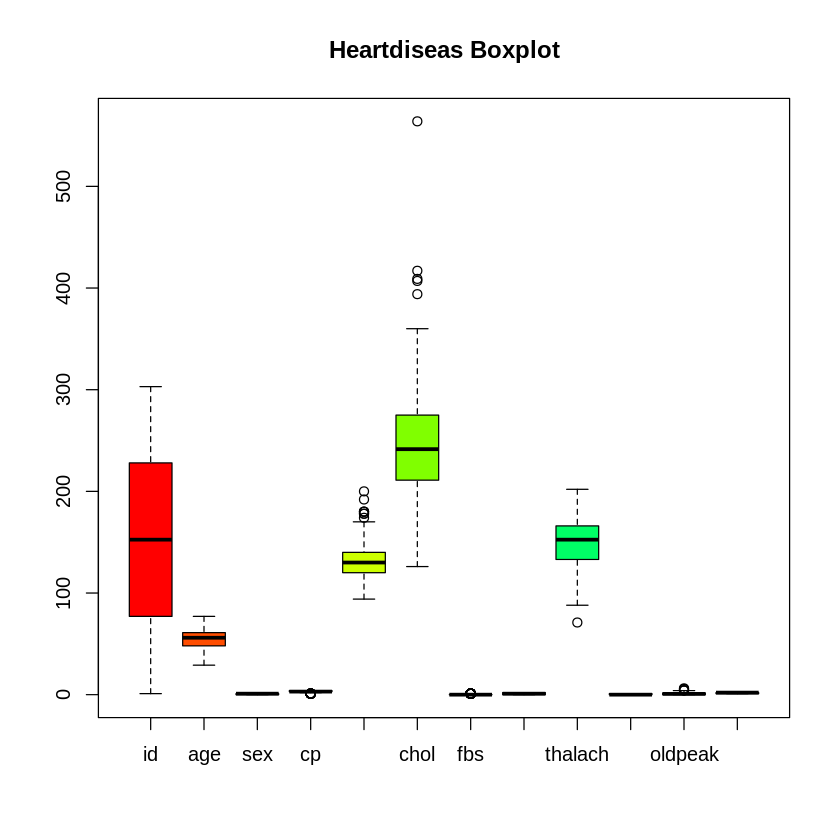

In [1153]:
boxplot(dn, col = rainbow(20), main = "Heartdiseas Boxplot")

In [1154]:
find_outliers <- function(column) {
  Q1 <- quantile(column, 0.25, na.rm = TRUE)
  Q3 <- quantile(column, 0.75, na.rm = TRUE)
  IQR <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR
  return(which(column < lower_bound | column > upper_bound))
}

numerical_cols <- c("age", "trestbps", "chol", "thalach", "oldpeak")
outliers <- lapply(dn[numerical_cols], find_outliers)

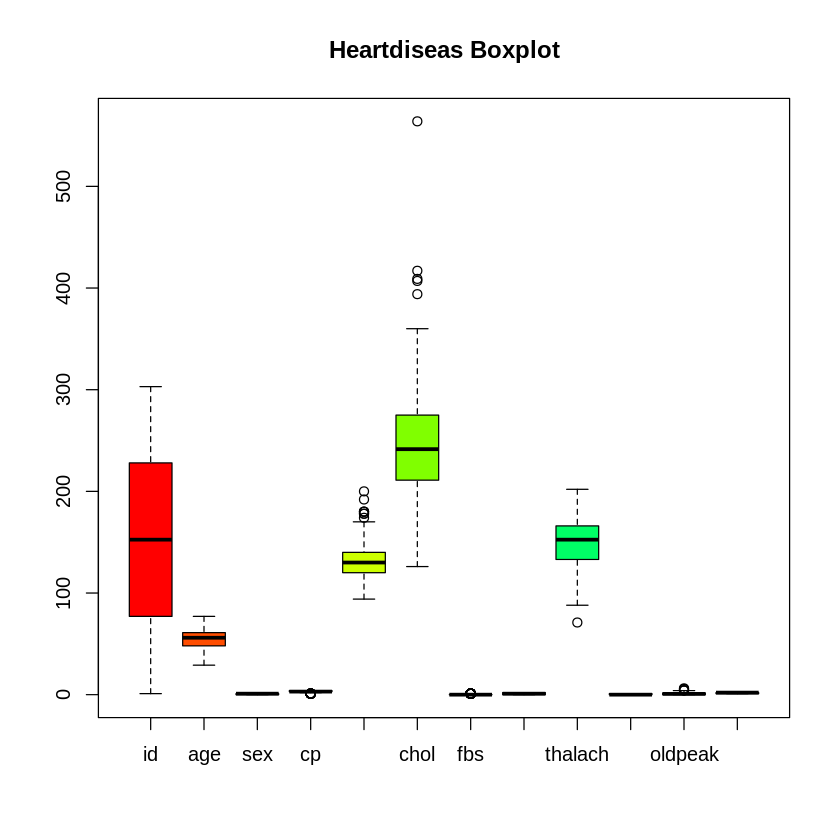

In [1155]:
boxplot(dn, col = rainbow(20), main = "Heartdiseas Boxplot")

In [1156]:
outliers

$age
integer(0)

$trestbps
[1]  83 126 172 183 188 201 213 231

$chol
[1]  48 121 152 173 181

$thalach
[1] 245

$oldpeak
[1]  91 123 183 191 285

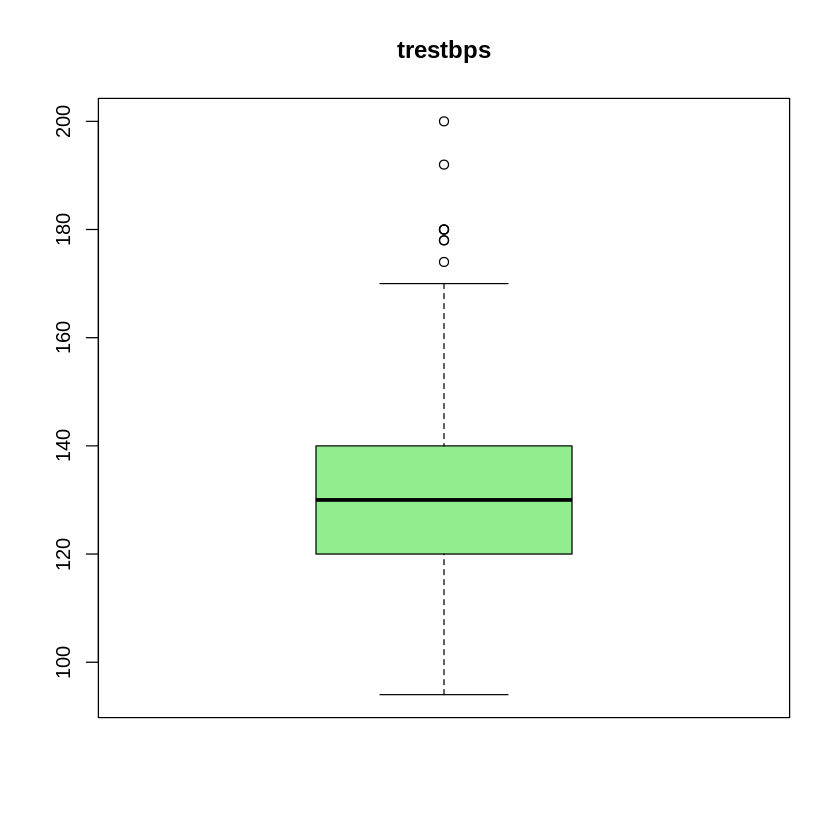

In [1157]:
boxplot(dn$trestbps, col = "light green", main = "trestbps")

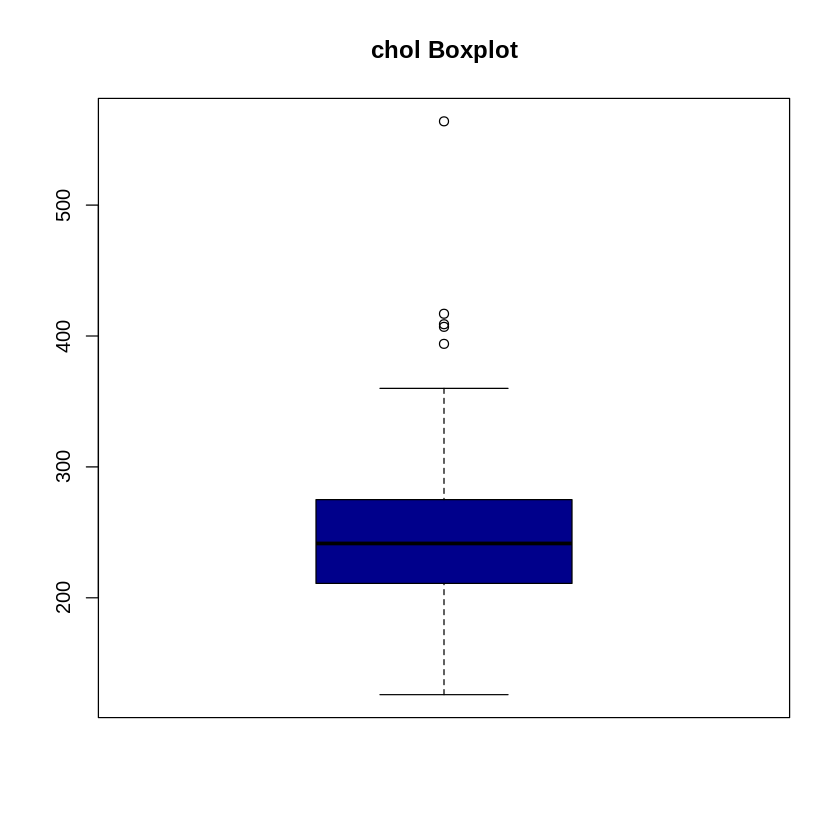

In [1158]:
boxplot(dn$chol, col ="dark blue", main = "chol Boxplot")

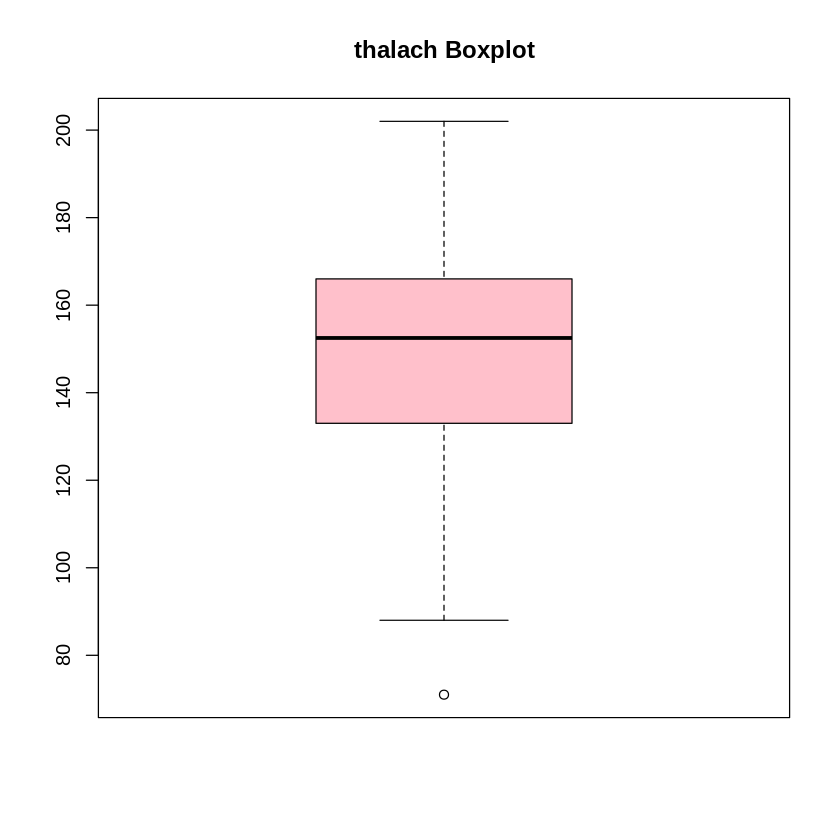

In [1159]:
boxplot(dn$thalach, col ="pink", main = "thalach Boxplot")

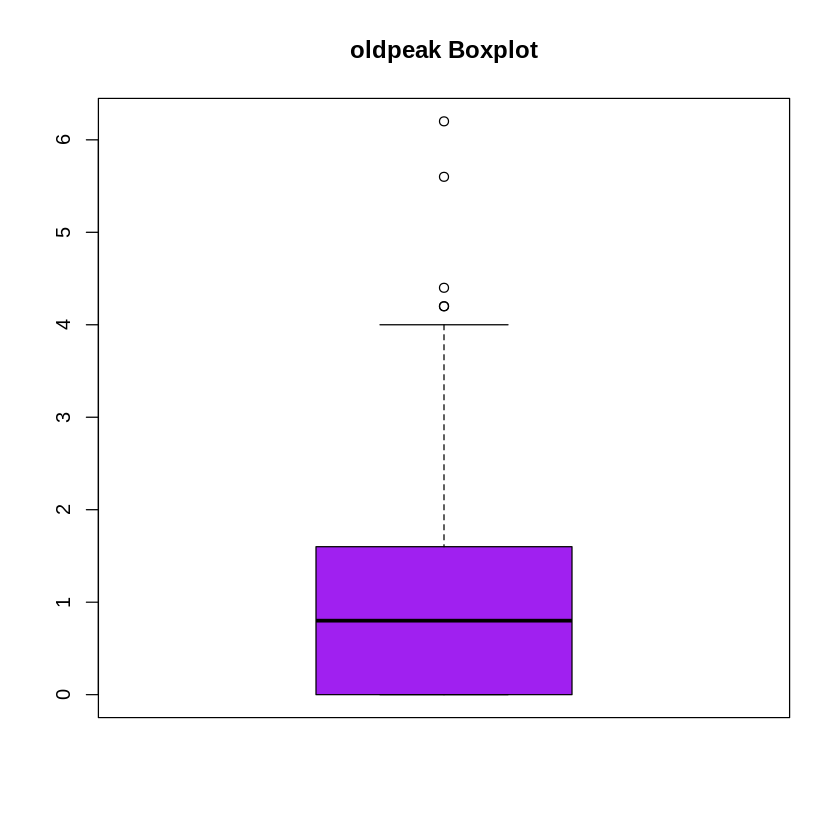

In [1160]:
boxplot(dn$oldpeak, col ="purple", main = "oldpeak Boxplot")

#**Remove outliers from a trestbps column**

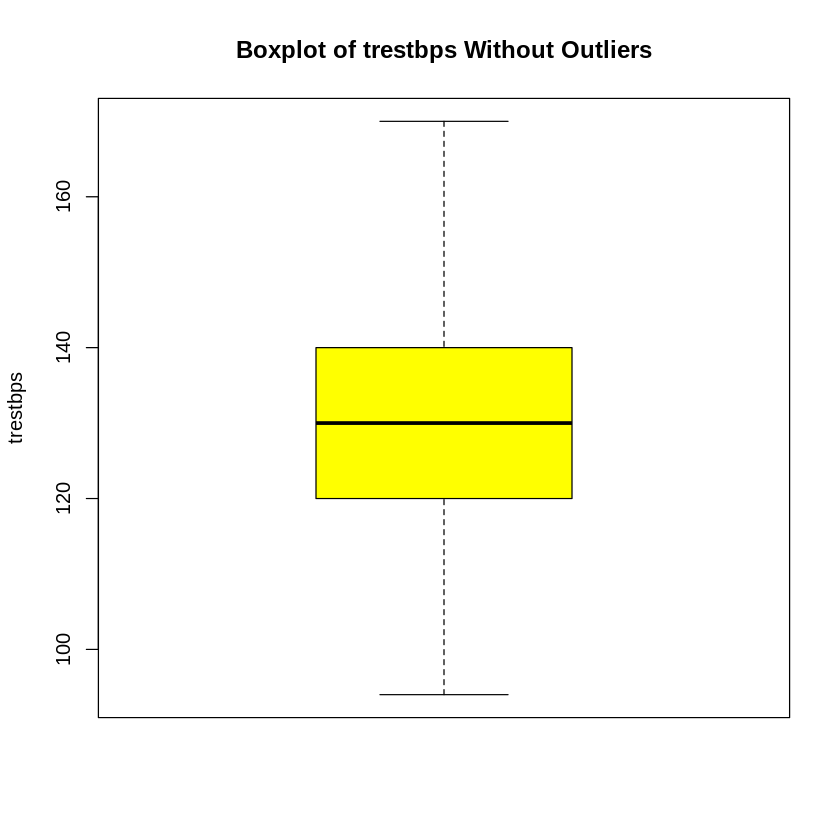

In [1161]:

column_data <- dn$trestbps
Q1 <- quantile(column_data, 0.25)
Q3 <- quantile(column_data, 0.75)
IQR <- Q3 - Q1

lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR
dn <- dn[column_data >= lower_bound & column_data <= upper_bound, ]


boxplot(dn$trestbps,
        col = "yellow",
        main = "Boxplot of trestbps Without Outliers",
        ylab = "trestbps")


#**Remove outliers from a chol column**

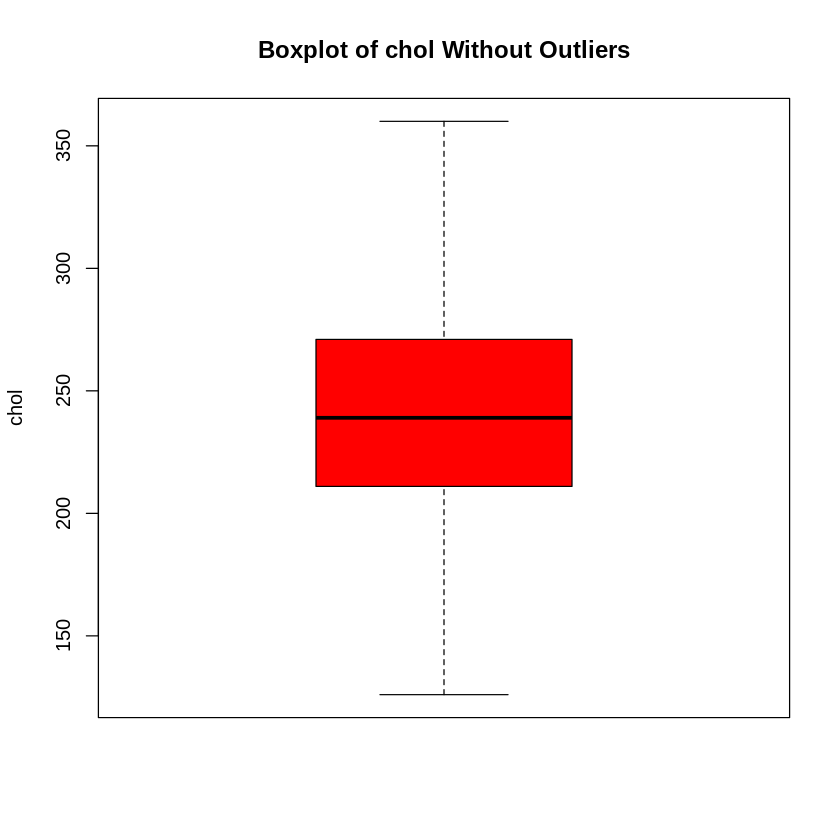

In [1162]:

column_data <- dn$chol
Q1 <- quantile(column_data, 0.25) # First quartile
Q3 <- quantile(column_data, 0.75) # Third quartile
IQR <- Q3 - Q1

lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR
dn <- dn[column_data >= lower_bound & column_data <= upper_bound, ]


boxplot(dn$chol,
        col = "red",
        main = "Boxplot of chol Without Outliers",
        ylab = "chol")


#**Remove outliers from a thalach column**

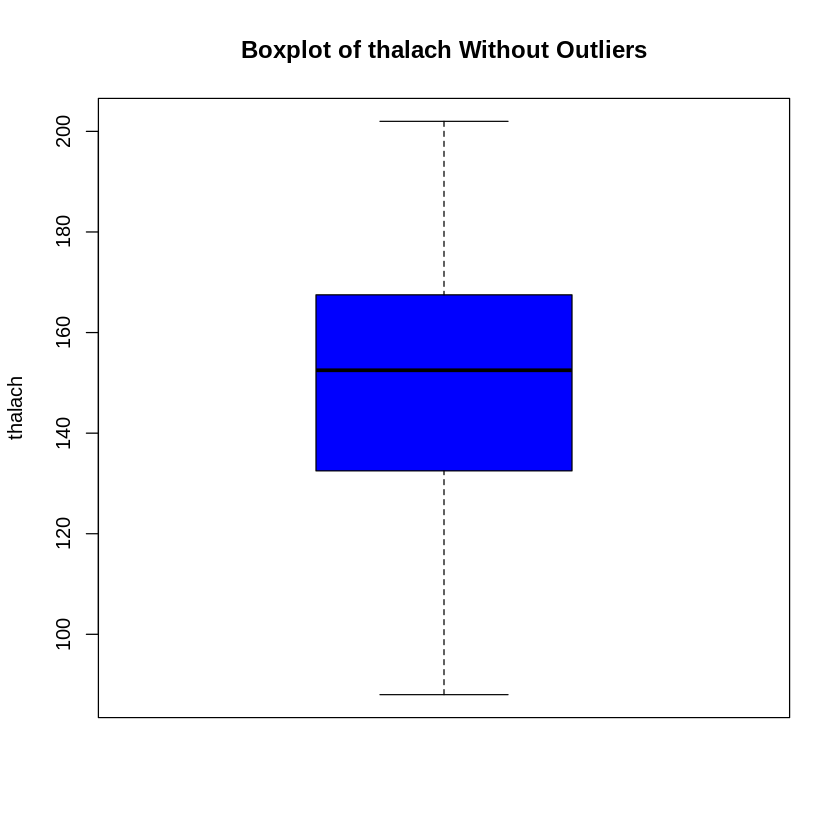

In [1163]:

column_data <- dn$thalach
Q1 <- quantile(column_data, 0.25)
Q3 <- quantile(column_data, 0.75)
IQR <- Q3 - Q1

lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR
dn <- dn[column_data >= lower_bound & column_data <= upper_bound, ]


boxplot(dn$thalach,
        col = "blue",
        main = "Boxplot of thalach Without Outliers",
        ylab = "thalach")


#**Remove outliers from a oldpeak column**

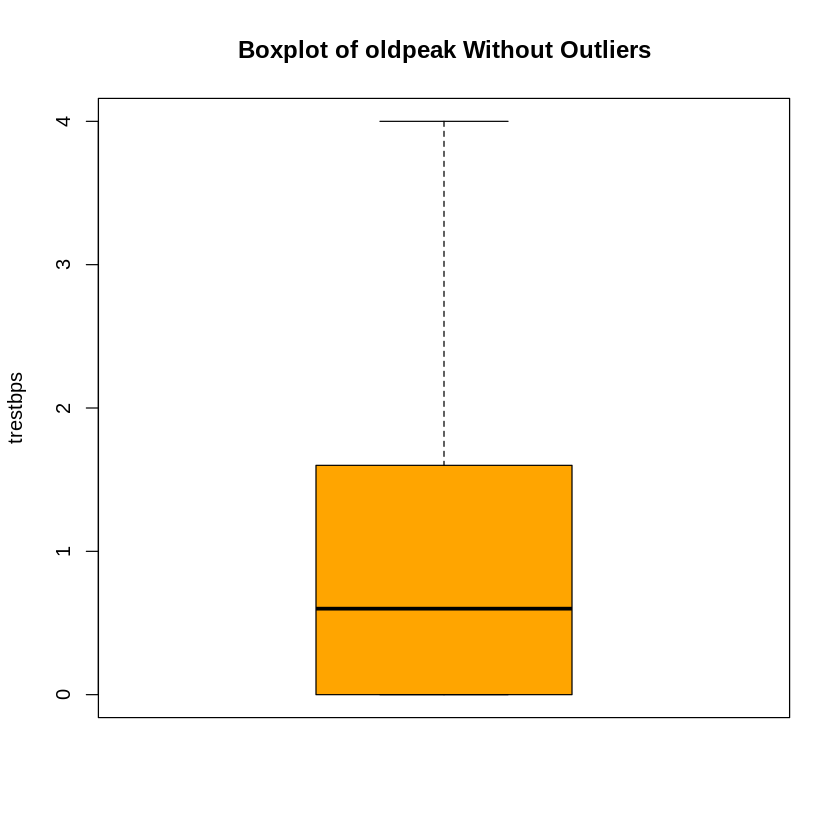

In [1164]:

column_data <- dn$oldpeak
Q1 <- quantile(column_data, 0.25)
Q3 <- quantile(column_data, 0.75)
IQR <- Q3 - Q1

lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR
dn <- dn[column_data >= lower_bound & column_data <= upper_bound, ]


boxplot(dn$oldpeak,
        col = "orange",
        main = "Boxplot of oldpeak Without Outliers",
        ylab = "trestbps")


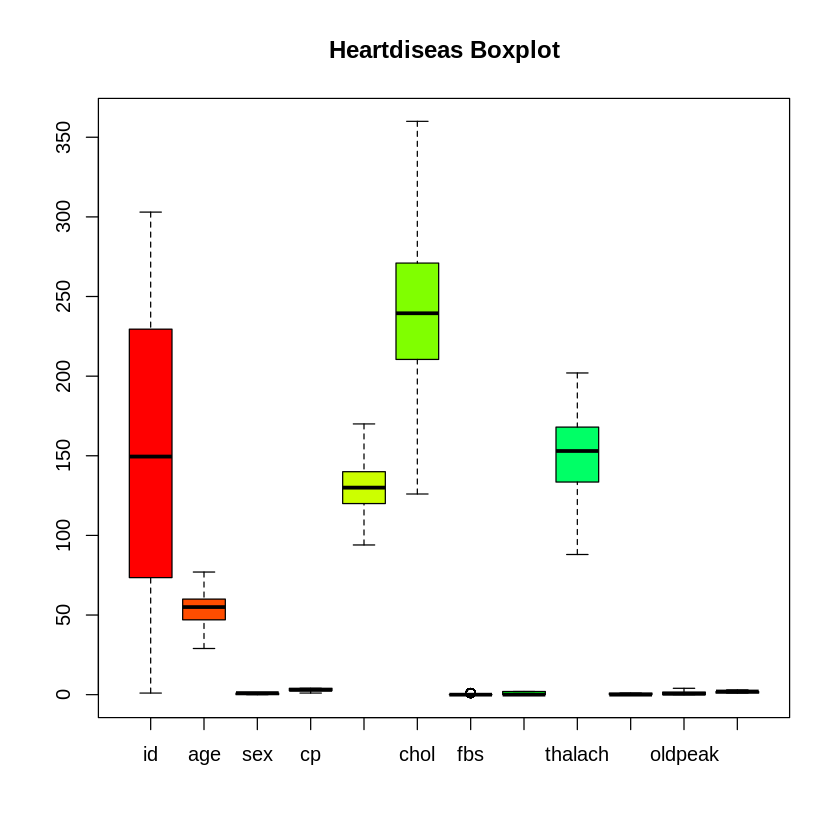

In [1165]:
boxplot(dn, col = rainbow(20), main = "Heartdiseas Boxplot")

In [1166]:
dim(dn)

[1] 284  12

In [1167]:
library(data.table)
data_table <- as.data.table(dn)
grouped_stats <- data_table[, .(
  mean_age = mean(age, na.rm = TRUE),
  count = .N
), by = .(sex, cp)]

print(grouped_stats)

     sex    cp mean_age count
   <int> <int>    <num> <int>
1:     1     1 54.05556    18
2:     1     4 55.00000   100
3:     1     3 52.53061    49
4:     0     2 51.94444    18
5:     1     2 50.93548    31
6:     0     4 56.45161    31
7:     0     3 54.30303    33
8:     0     1 63.25000     4


In [1168]:
library(dplyr)
grouped_data <- dn %>% group_by(sex, cp)
group_summaries <- grouped_data %>%
  summarise(mean_age = mean(age, na.rm = TRUE),
            count = n())

print(group_summaries)

`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


# A tibble: 8 × 4
# Groups:   sex [2]
    sex    cp mean_age count
  <int> <int>    <dbl> <int>
1     0     1     63.2     4
2     0     2     51.9    18
3     0     3     54.3    33
4     0     4     56.5    31
5     1     1     54.1    18
6     1     2     50.9    31
7     1     3     52.5    49
8     1     4     55     100


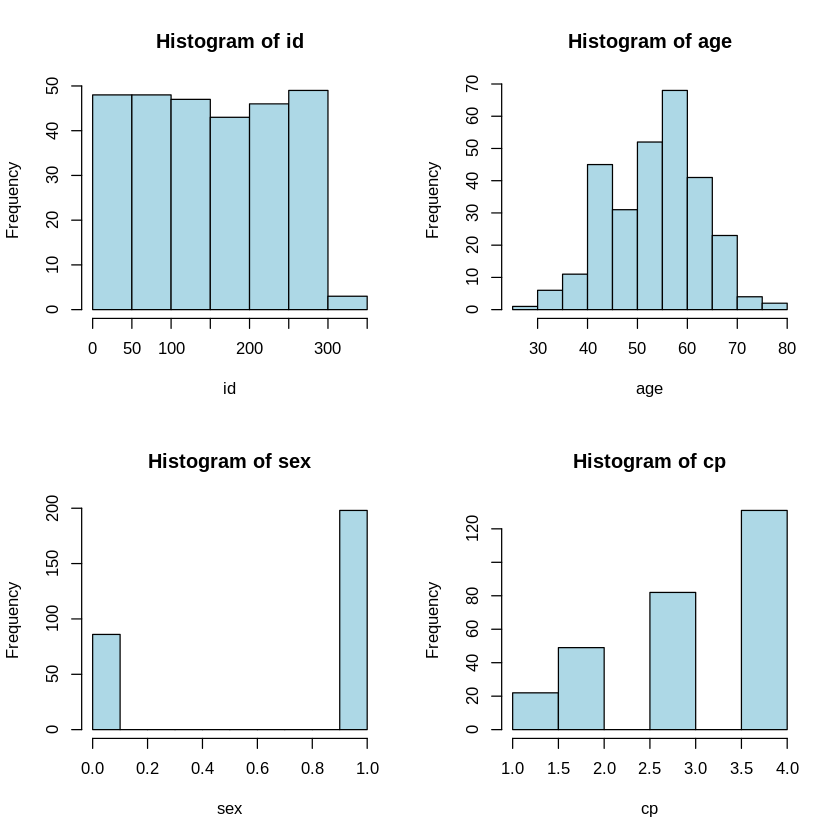

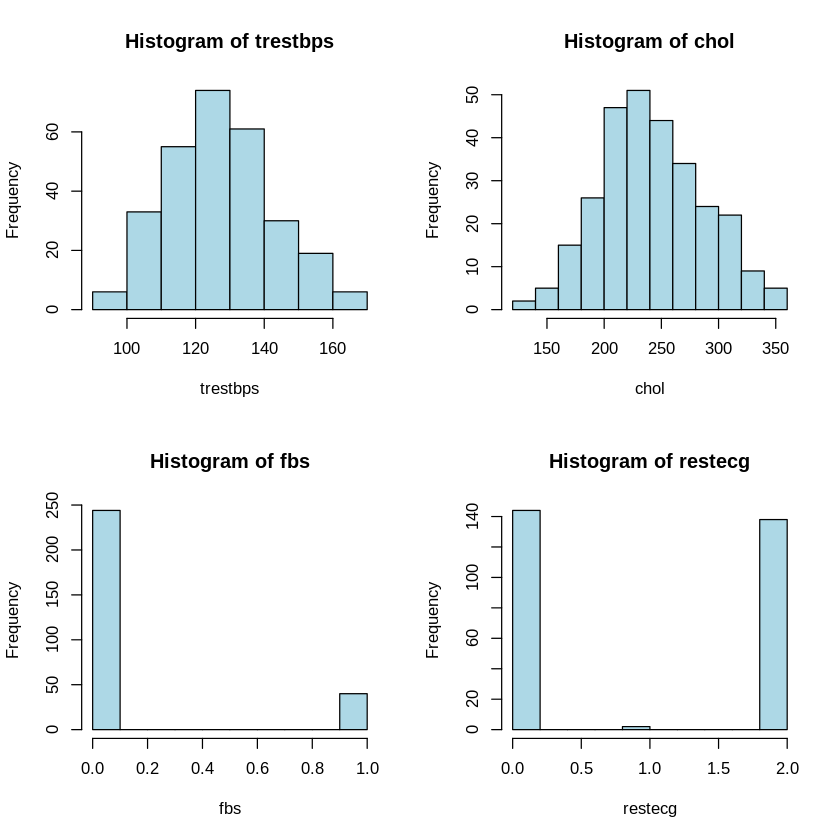

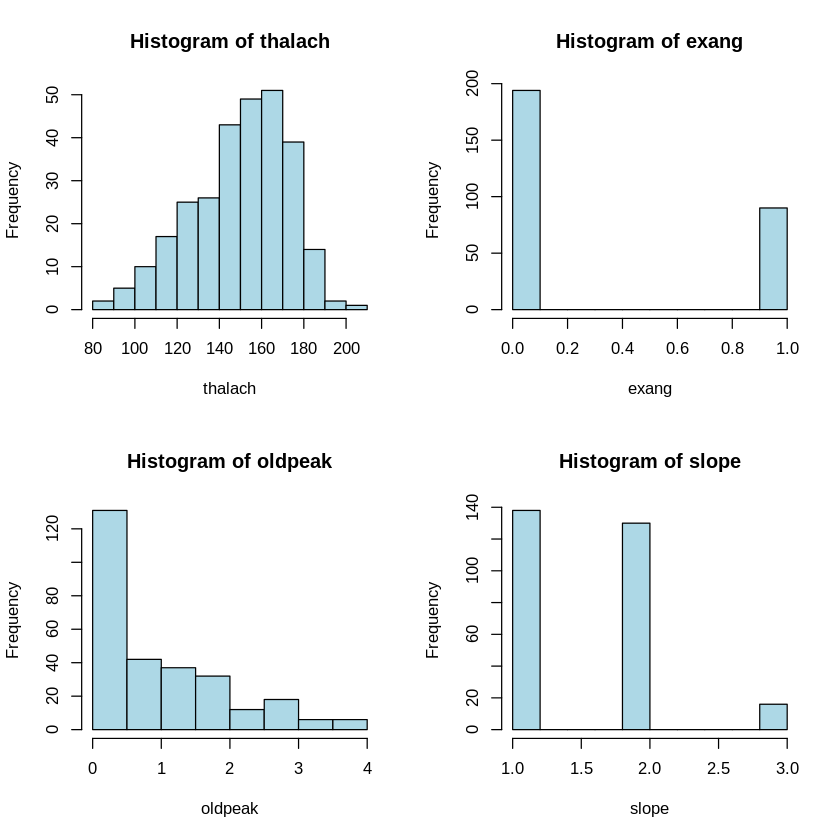

In [1169]:
par(mfrow = c(2, 2))

for (col_name in names(dn)) {

  if (is.numeric(dn[[col_name]])) {
    hist(
      dn[[col_name]],
      main = paste("Histogram of", col_name),
      xlab = col_name,
      col = "lightblue",
      border = "black"
    )
  }
}
par(mfrow = c(1, 1))

In [1170]:
num_col <- sapply(dn, is.numeric)
num_col["id"] <- FALSE

for (i in names(dn)[num_col]) {
  dn[[i]] <- (dn[[i]] - min(dn[[i]])) / (max(dn[[i]]) - min(dn[[i]]))
}

head(dn)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.7083333,1,0.0000000,0.6710526,0.4572650,1,1,0.5438596,0,0.575,1.0
2,2,0.7916667,1,1.0000000,0.8684211,0.6837607,0,1,0.1754386,1,0.375,0.5
3,3,0.7916667,1,1.0000000,0.3421053,0.4401709,0,1,0.3596491,1,0.650,0.5
4,4,0.1666667,1,0.6666667,0.4736842,0.5299145,0,0,0.8684211,0,0.875,1.0
5,5,0.2500000,0,0.3333333,0.4736842,0.3333333,0,1,0.7368421,0,0.350,0.0
6,6,0.5625000,1,0.3333333,0.3421053,0.4700855,0,0,0.7894737,0,0.200,0.0


In [1171]:
# Normalize the data (excluding 'id' column as it's not relevant for clustering)
#data_for_clustering <- data_after_remove_duplicated[, -1]
#data_normalized <- scale(data_for_clustering)

# Min-Max normalization function
#min_max_normalize <- function(x) {
 # return((x - min(x)) / (max(x) - min(x)))
#}

# Identify numeric columns, excluding 'id'
#numeric_columns <- sapply(dn, is.numeric)
#numeric_columns["id"] <- FALSE  # Exclude the 'id' column

# Apply Min-Max normalization to numeric columns
#dn[numeric_columns] <- lapply(
  #dn[numeric_columns],
 # min_max_normalize
#)

# View the updated data
#head(dn)




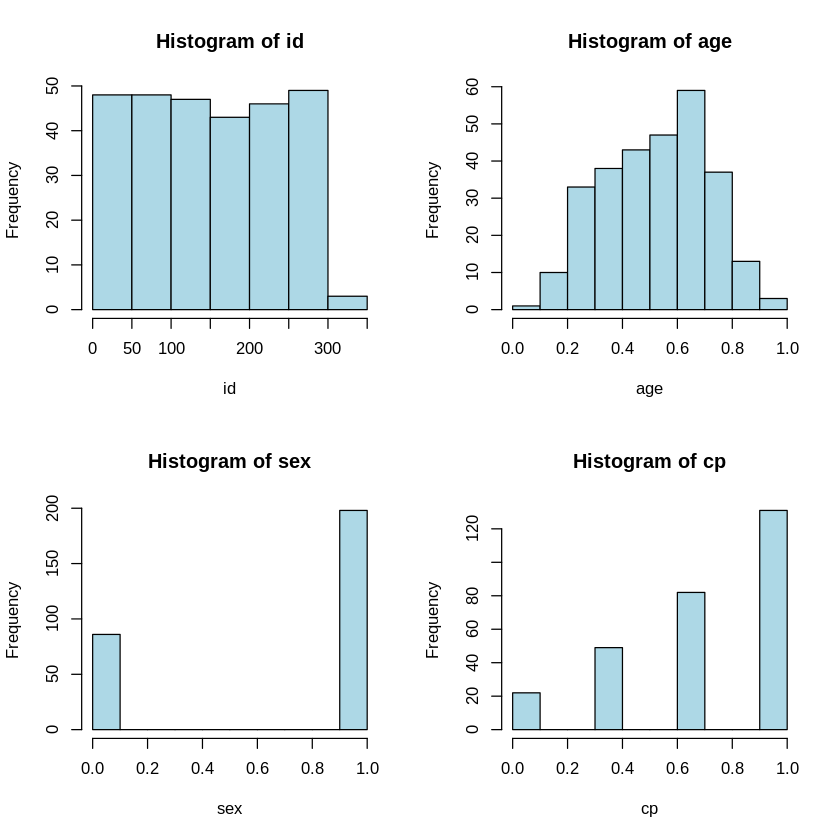

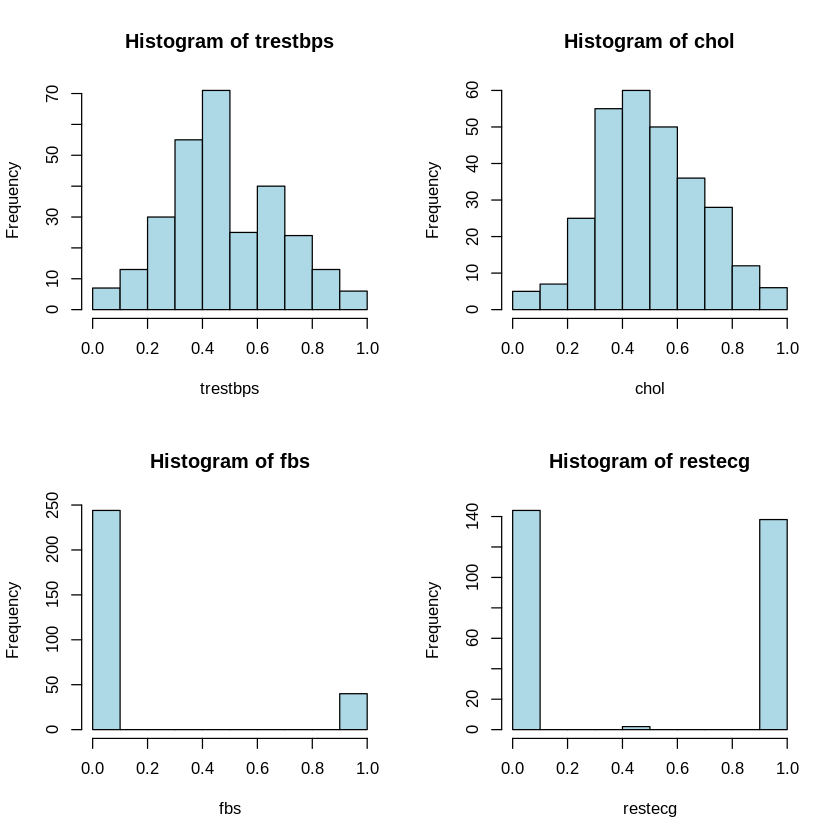

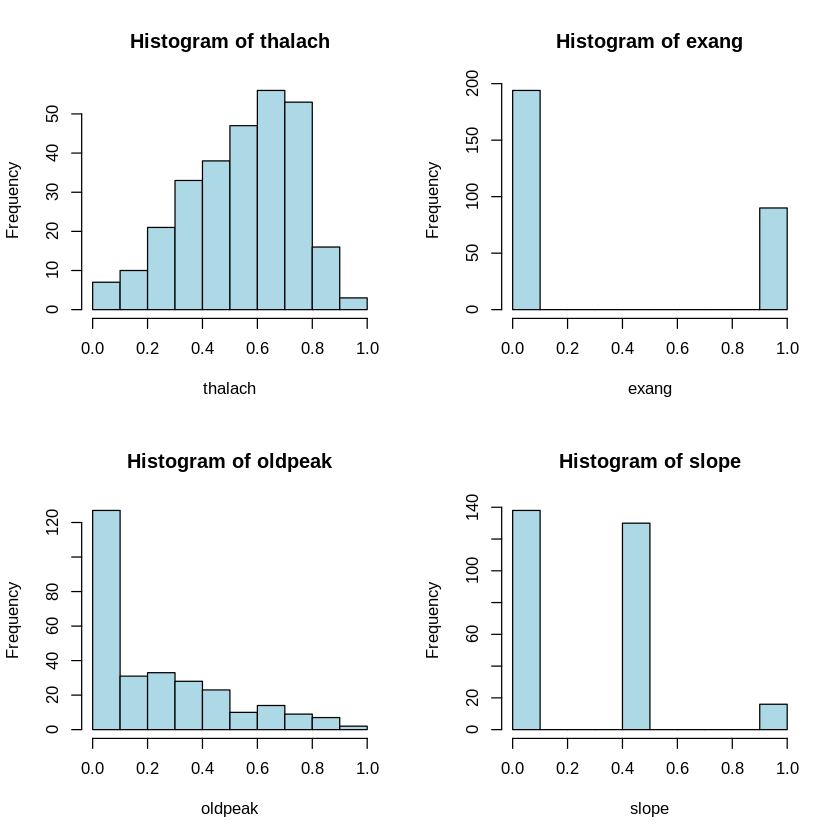

In [1172]:
par(mfrow = c(2, 2))
for (col_name in names(dn)) {
  # lw haga msh numeric skip
  if (is.numeric(dn[[col_name]])) {
    hist(
      dn[[col_name]],
      main = paste("Histogram of", col_name),
      xlab = col_name,
      col = "lightblue",
      border = "black"
    )
  }
}


par(mfrow = c(1, 1))

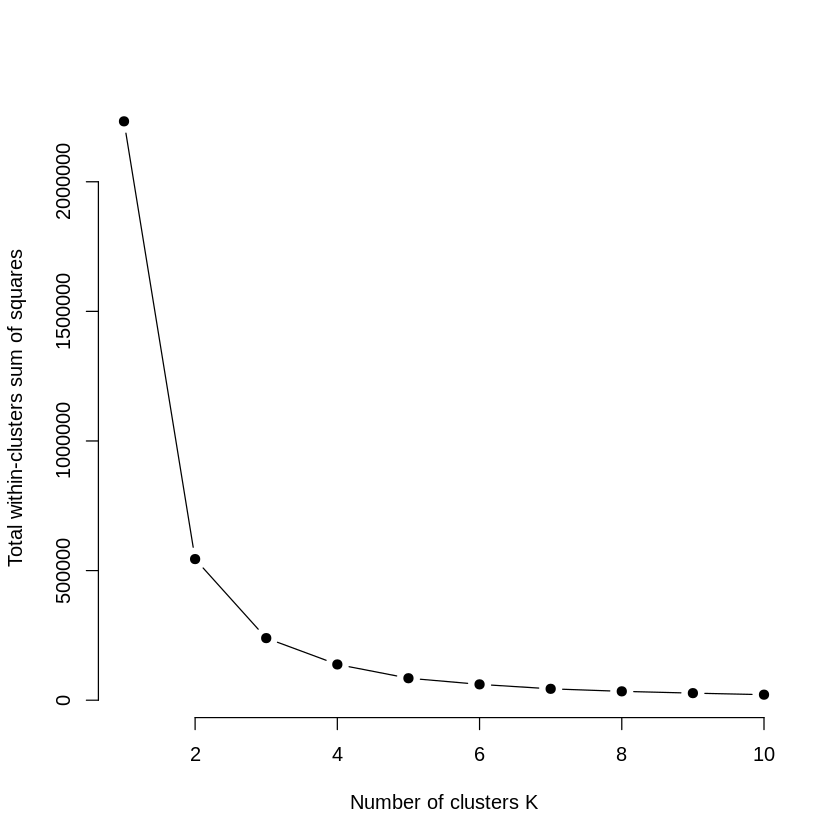

In [1173]:

bestK <- (nrow(dn)-1)*sum(apply(dn, 2, var))
k.max <- 10
bestK <- sapply(1:k.max, function(k){
  kmeans(dn, centers=k, nstart=10)$tot.withinss
})

plot(1:k.max, bestK, type="b", pch = 19, frame = FALSE,
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")

In [1174]:
#install.packages(c( "cluster", "factoextra", "fpc"))
library(cluster)
library(factoextra)
library(fpc)


In [1175]:
library(mclust)
library(ggplot2)

In [1176]:
summary(dn)

       id              age              sex               cp        
 Min.   :  1.00   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 73.75   1st Qu.:0.3750   1st Qu.:0.0000   1st Qu.:0.5833  
 Median :149.50   Median :0.5417   Median :1.0000   Median :0.6667  
 Mean   :151.46   Mean   :0.5223   Mean   :0.6972   Mean   :0.7113  
 3rd Qu.:229.25   3rd Qu.:0.6458   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :303.00   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
    trestbps           chol             fbs            restecg      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.3421   1st Qu.:0.3622   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.4737   Median :0.4850   Median :0.0000   Median :0.0000  
 Mean   :0.4735   Mean   :0.4980   Mean   :0.1408   Mean   :0.4894  
 3rd Qu.:0.6053   3rd Qu.:0.6197   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
    thalach           exang       

#**Best number of clusters**

In [1177]:
best_num <- diff(wss)
point <- which.min(best_num) + 1
cat("The optimal number of clusters is", point, "\n")

The optimal number of clusters is 2 


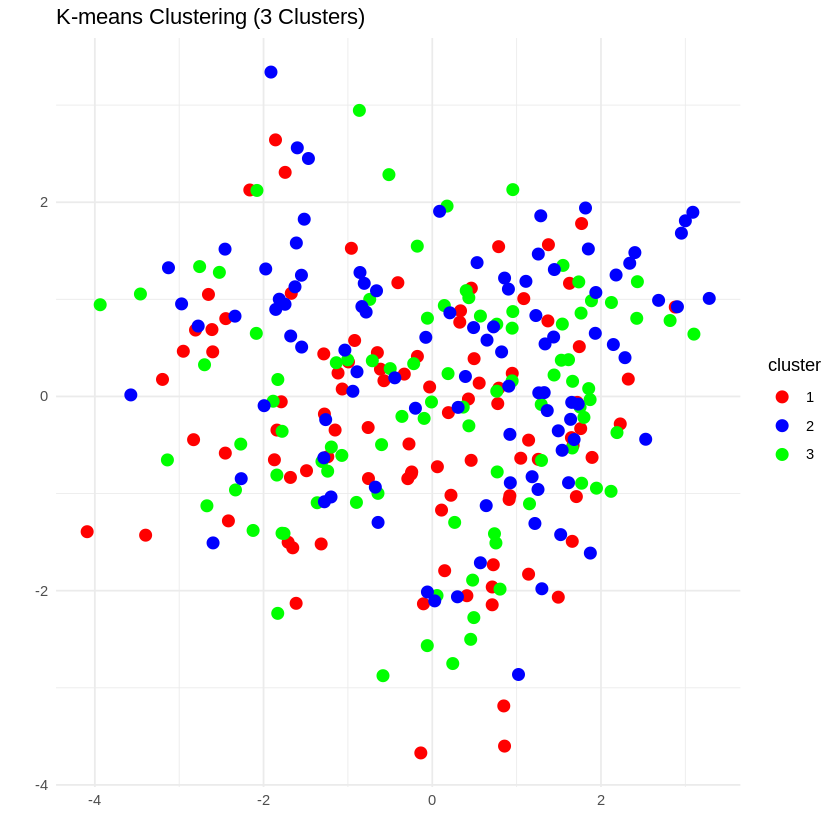

In [1178]:
pca_final <- prcomp(dn, scale. = TRUE)

kmeans_algo <- kmeans(dn, centers = 3, nstart = 25)

to_df <- data.frame(pca_final$x[, 1:2])
to_df$cluster <- as.factor(kmeand_algo$cluster)

ggplot(to_df, aes(x = PC1, y = PC2, color = cluster)) +
  geom_point(size = 3) +
  scale_color_manual(values = c("red", "blue", "green")) +
  labs(title = "K-means Clustering (3 Clusters)", x = "", y = "") +
  theme_minimal()

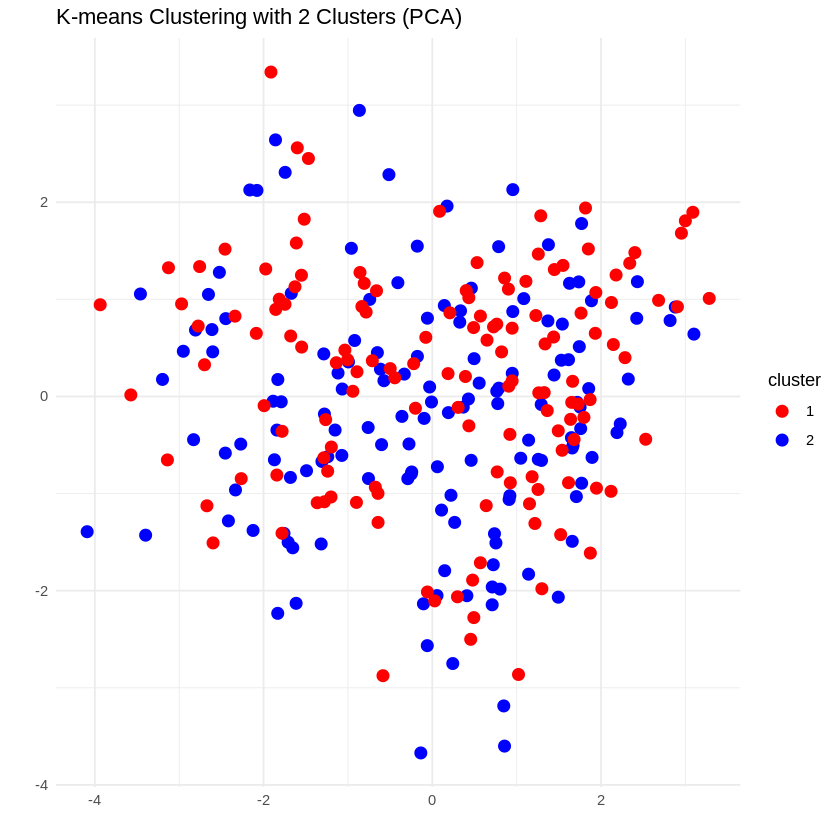

In [1179]:

pca_results <- prcomp(dn, scale. = TRUE)

kmeans_algo <- kmeans(dn, centers = 2, nstart = 25)

to_df <- data.frame(pca_results$x[, 1:2])
to_df$cluster <- as.factor(kmeans_algo$cluster)
ggplot(to_df, aes(x = PC1, y = PC2, color = cluster)) +
  geom_point(size = 3) +
  scale_color_manual(values = c("red", "blue")) +
  labs(title = "K-means Clustering with 2 Clusters (PCA)", x = "", y = "") +
  theme_minimal()

In [1180]:
dim(dn)

[1] 284  12

In [1181]:

set.seed(123)
kmeand_algo <- kmeans(dn, centers = 3, nstart = 25)
print("Cluster Sizes:")
print(table(kmeand_algo$cluster))


[1] "Cluster Sizes:"

 1  2  3 
94 98 92 


#**Visualize the clustering results with**
#**fviz_cluster and plot cluster centers using base R**

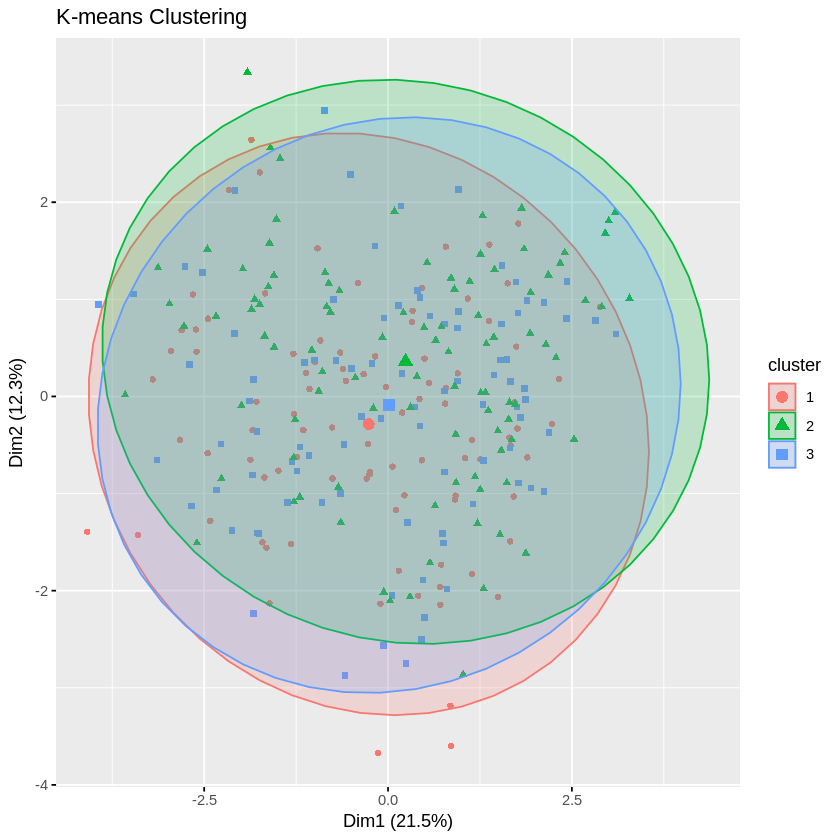

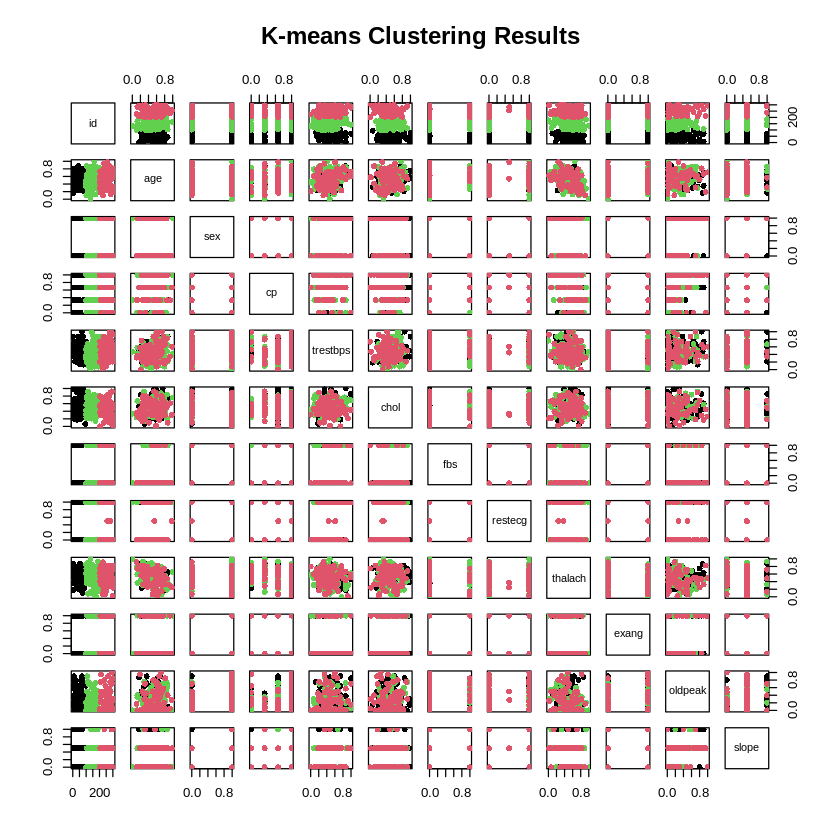

In [1182]:
library(factoextra)
fviz_cluster(kmeand_algo, data = dn,
             geom = "point",
             ellipse.type = "norm",
             main = "K-means Clustering")

plot(dn, col = kmeand_algo$cluster,
     main = "K-means Clustering Results",
     pch = 16)
points(kmeand_algo$centers[, 1], kmeand_algo$centers[, 2],
       col = 1:3, pch = 17, cex = 2)



#**hierarchical clustering and plot**

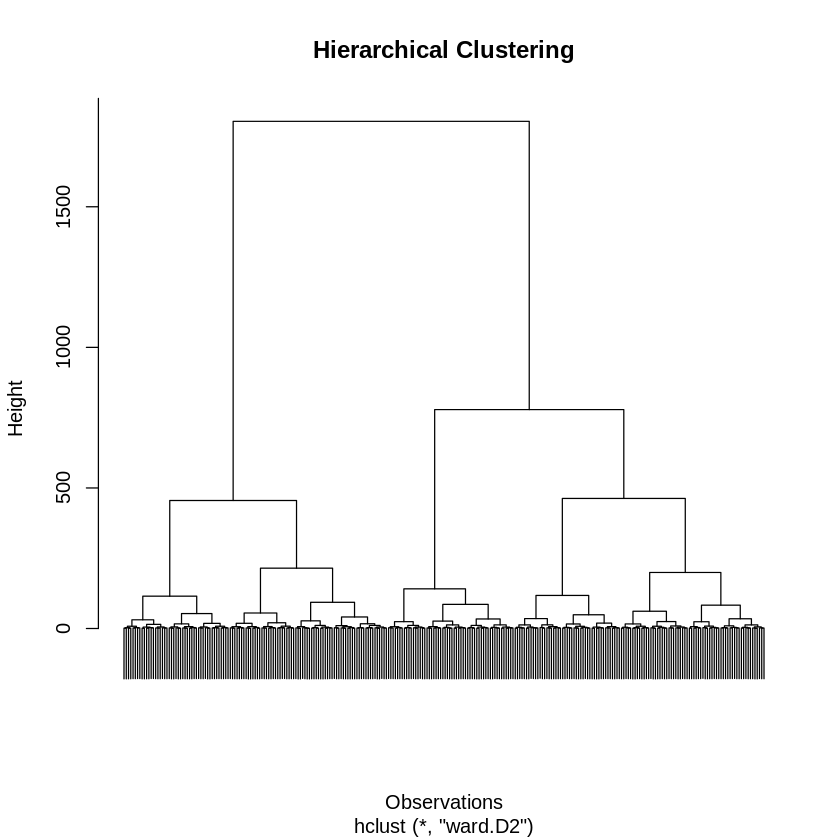

In [1183]:
clust_hir <- dist(dn)
hie_final <- hclust(clust_hir, method = "ward.D2")


plot(hie_final, main = "Hierarchical Clustering",
     xlab = "Observations", ylab = "Height", labels = FALSE)


#**Perform DBSCAN clustering**

In [1184]:
#install.packages("dbscan")
library(dbscan)
dbscan_algo <- dbscan(dn, eps = 0.5, minPts = 5)
cat("Number of clusters by DBSCAN:", length(unique(dbscan_algo$cluster)), "\n")
#not good because 1 cluster

Number of clusters by DBSCAN: 1 


#**using KNN to know the best eps DBSCAN**

[1] "DBSCAN Clusters:"

  0 
284 


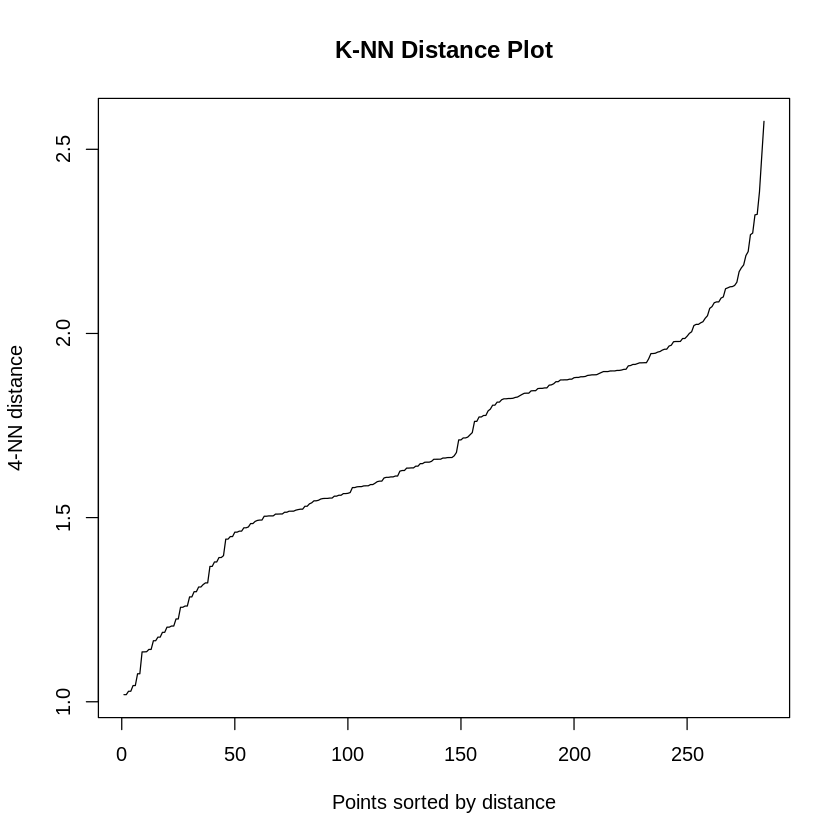

In [1185]:
KNN_final <- kNNdist(dn, k=1)
plot(sort(KNN_final), type='l', xlab='Points sorted by distance',
     ylab='4-NN distance', main='K-NN Distance Plot')

dbscan_out <- dbscan(dn, eps = 0.5, minPts = 4)

print("DBSCAN Clusters:")
print(table(dbscan_out$cluster))

#**Gaussian Mixture(GMM)clustering and plot**

[1] "Optimal number of clusters:"
[1] 3


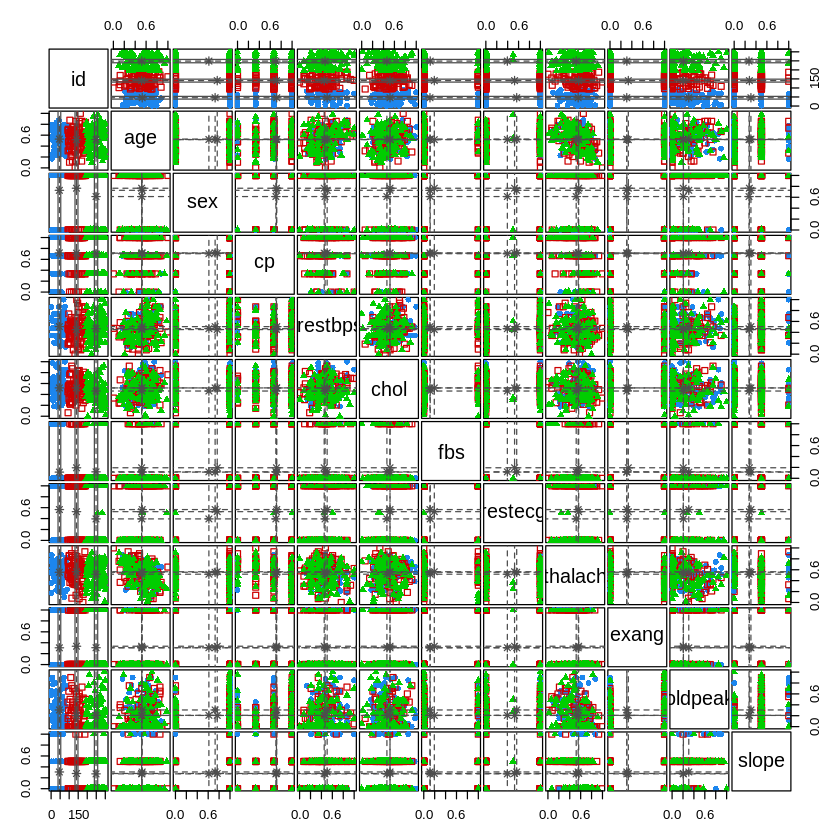

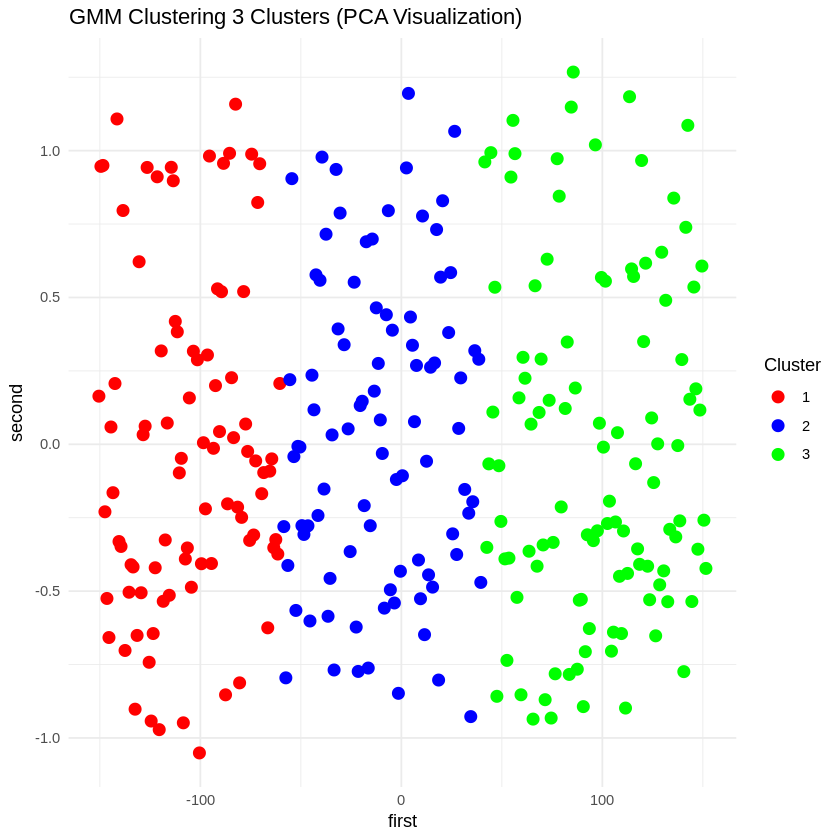

In [1186]:
library(mclust)
library(ggplot2)

gussian_final <- Mclust(dn, G = 3)


print("Optimal number of clusters:")
print(gussian_final$G)

plot(gussian_final, what = "classification")

to_df <- data.frame(
  prcomp(dn)$x[, 1:2],
  cluster = as.factor(gussian_final$classification)
)

colnames(to_df)[1:2] <- c("PC1", "PC2")

ggplot(to_df, aes(x = PC1, y = PC2, color = cluster)) +
  geom_point(size = 3) +
  labs(
    title = "GMM Clustering 3 Clusters (PCA Visualization)",
    x = "first",
    y = "second",
    color = "Cluster"
  ) +
  theme_minimal() +
  scale_color_manual(values = c("red", "blue", "green"))


#**Spectral clustering and plot**

[1] "Spectral Clustering Results:"
final_spect
  1   2   3 
106  91  87 
[1] "centers"
  Cluster        id       age       sex        cp  trestbps      chol       fbs
1       1 248.56604 0.5204403 0.6132075 0.7044025 0.4671053 0.4629495 0.1226415
2       2  47.47253 0.5302198 0.7142857 0.7179487 0.5011567 0.5145581 0.1098901
3       3 141.93103 0.5162835 0.7816092 0.7126437 0.4522081 0.5234306 0.1954023
    restecg   thalach     exang   oldpeak     slope
1 0.3962264 0.5174611 0.3113208 0.2073113 0.2735849
2 0.5604396 0.5580297 0.2967033 0.3016484 0.3076923
3 0.5287356 0.5612019 0.3448276 0.2060345 0.2758621


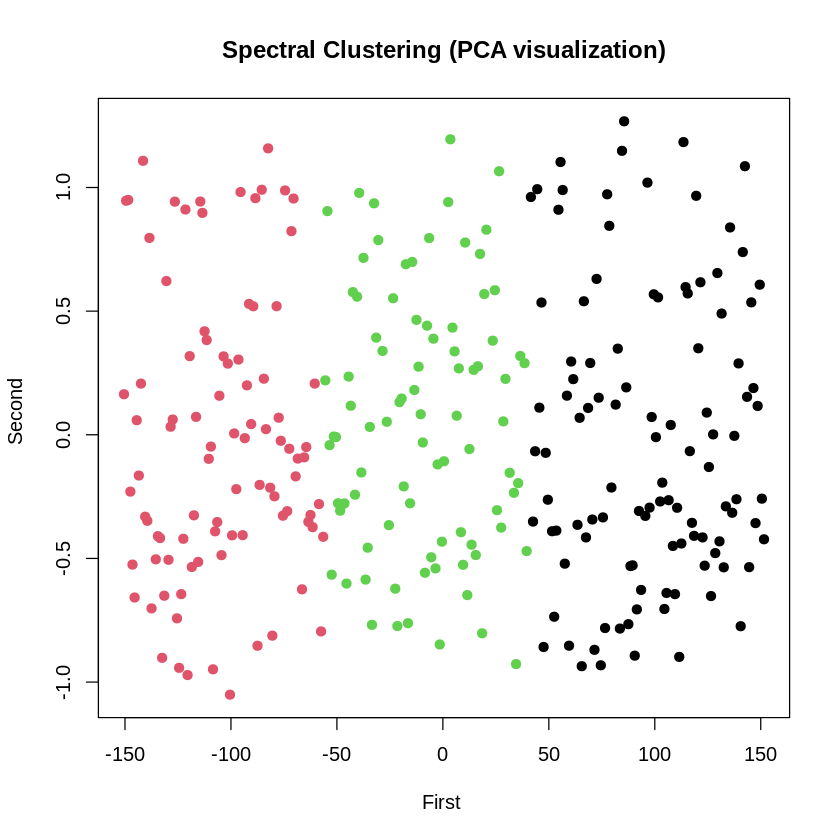

In [1187]:
library(kernlab)

final_spect <- specc(as.matrix(dn), centers=3)
table_spect <- table(final_spect)
print("Spectral Clustering Results:")
print(table_spect)
cluster_c <- aggregate(dn, by=list(Cluster=final_spect), mean)
print("centers")
print(head(cluster_c))
vis_pcaa <- prcomp(dn)
plot(vis_pcaa$x[,1:2], col=final_spect, pch=19,
     xlab="First ",
     ylab="Second ",
     main="Spectral Clustering (PCA visualization)")

#**K-Medoids Clustering and plot**

[1] "K-Medoids Results:"

 1  2  3 
94 93 97 


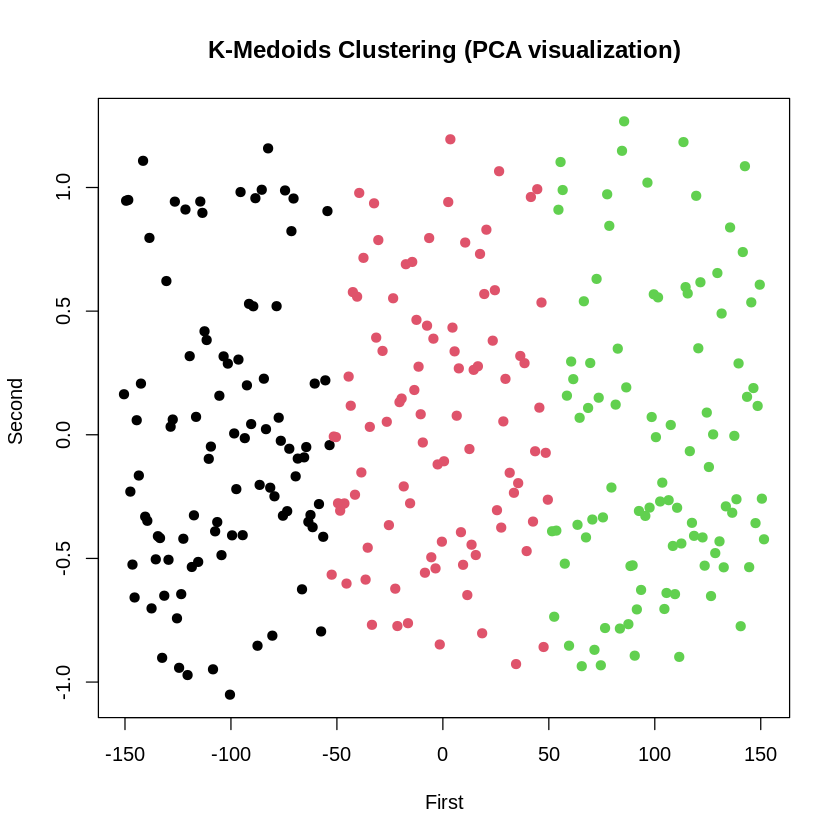

In [1188]:

final_kmedoide <- pam(dn, k = 3)

print("K-Medoids Results:")
print(table(final_kmedoide$clustering))

vis_pca <- prcomp(dn)
plot(vis_pca$x[,1:2], col=final_kmedoide$clustering, pch=19,
     xlab="First",
     ylab="Second ",
     main="K-Medoids Clustering (PCA visualization)")